# House sales analysis

In [262]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [263]:
%matplotlib inline

In [264]:
houses = pd.read_csv('houses.csv')

In [265]:
# houses.head()

In [266]:
sb.set(context="talk")
sb.set_palette("BuGn_d")
sb.set_palette("PRGn")
sb.set_palette("YlGnBu")
sb.set_palette("Paired")
sb.set_palette(sb.color_palette("PRGn", 10))
# sb.set_palette(sb.palplot(sb.light_palette("purple")))

## House price distribution
The majority of houses sold, have prices ranging between £400000 and £500000

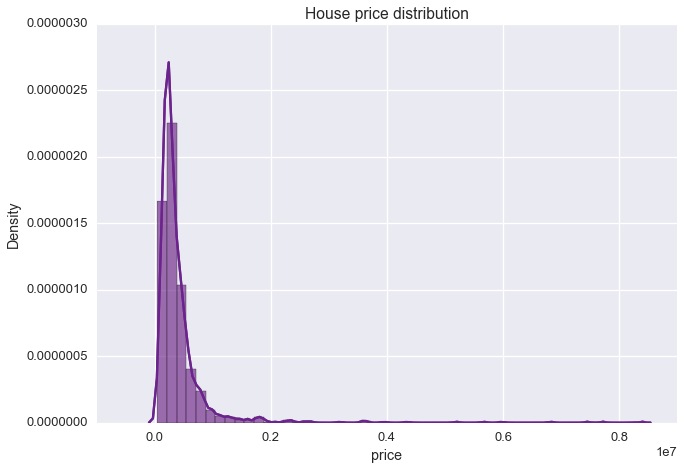

In [267]:
# Initialise figure and axes 
fig, ax = plt.subplots()

# Update axis object 
ax = sb.distplot(houses.price, ax=ax)

# Further customisation
ax.set_ylabel('Density')
ax.set_title('House price distribution')

sb.distplot(houses['price'], color='#6B238E')

# House area distribution
There is a tendency towards smaller houses. In fact, the highest volume of sales was observed for houses of 50 sqm

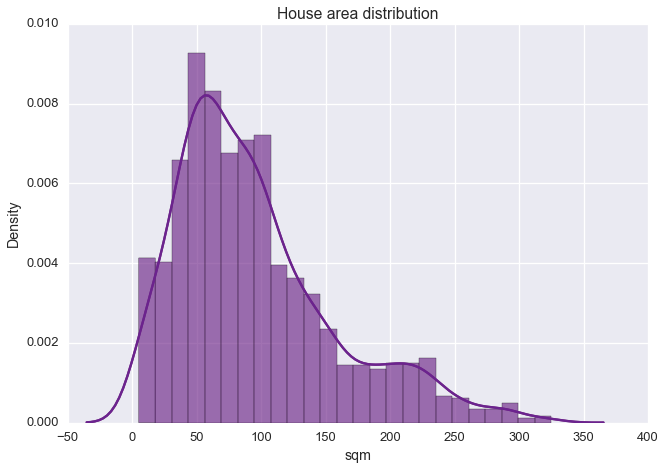

In [268]:
# Initialise figure and axes 
fig, ax = plt.subplots()

# Update axis object 
ax = sb.distplot(houses.sqm, ax=ax)

# Further customisation
ax.set_ylabel('Density')
ax.set_title('House area distribution')

sb.distplot(houses['sqm'], color='#6B238E')

# Sales by property types
Not surprisingly, taking into account a trend toward smaller house areas, the most popular property type is the flat.

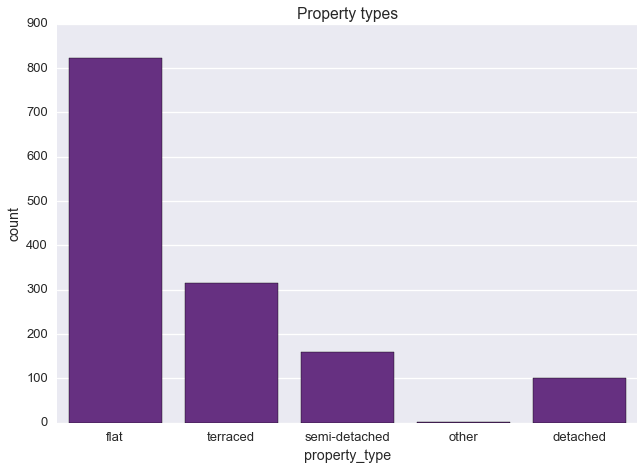

In [269]:
# Initialise figure and axes 
fig, ax = plt.subplots()


# Further customisation
ax.set_ylabel('Count')
ax.set_title('Property types')

ax = sb.countplot(x="property_type", data=houses, color='#6B238E')

# Sales by estate type
The high amount of flats sold also reflects on the type of estate, leasehold being the most popular estate type.

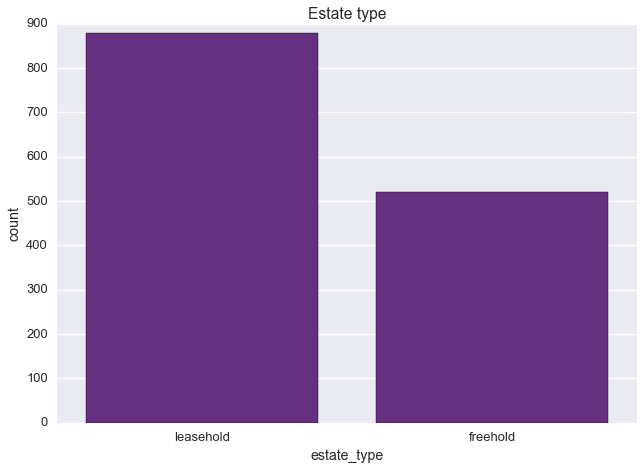

In [270]:
# Initialise figure and axes 
fig, ax = plt.subplots()


# Further customisation
ax.set_ylabel('Count')
ax.set_title('Estate type')

ax = sb.countplot(x="estate_type", data=houses, color='#6B238E')

# Most popular districts
 Bellow are the top 5 districts with the highest volume of sales. However, it is clear that London greatly surpasses any other district

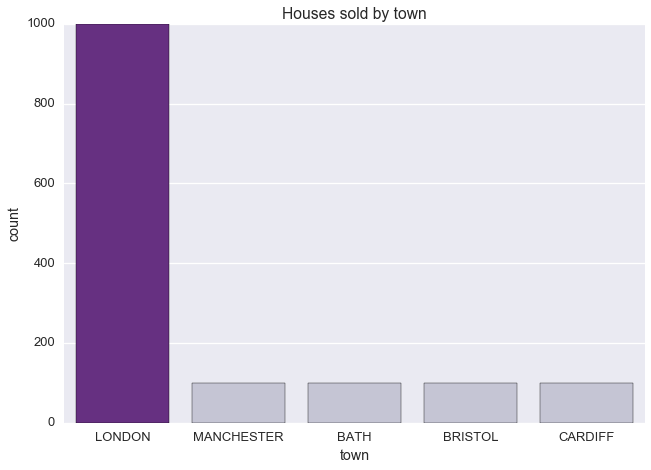

In [271]:
# Initialise figure and axes 
fig, ax = plt.subplots()
cols = {town: '#6B238E' if town == 'LONDON' else '#c2c2d6' for town in houses.town.unique()}

# Further customisation
ax.set_ylabel('Count')
ax.set_title('Houses sold by town')
ax = sb.countplot(x="town", data=houses, palette=cols)

 # Sales by number of bedrooms
The highest volume of transactions was made for 2-bedroom houses

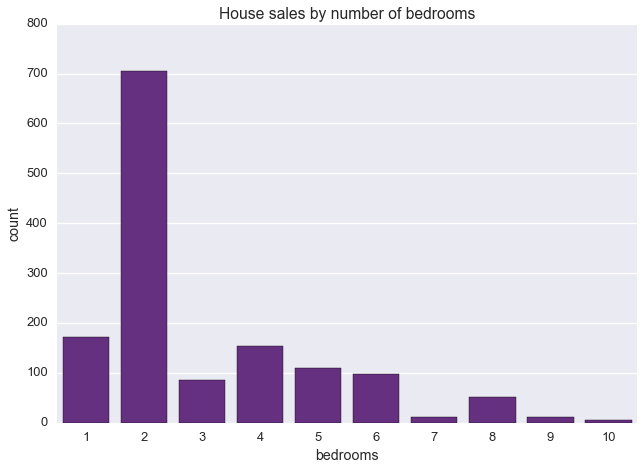

In [272]:
# Initialise figure and axes 
fig, ax = plt.subplots()


# Further customisation
ax.set_ylabel('Count')
ax.set_title('House sales by number of bedrooms')

ax = sb.countplot(x="bedrooms", data=houses, color='#6B238E')

# Sales by number of bathrooms
Most houses have 2 or 3 bathrooms, however some interesting sales were made on houses without bathrooms.

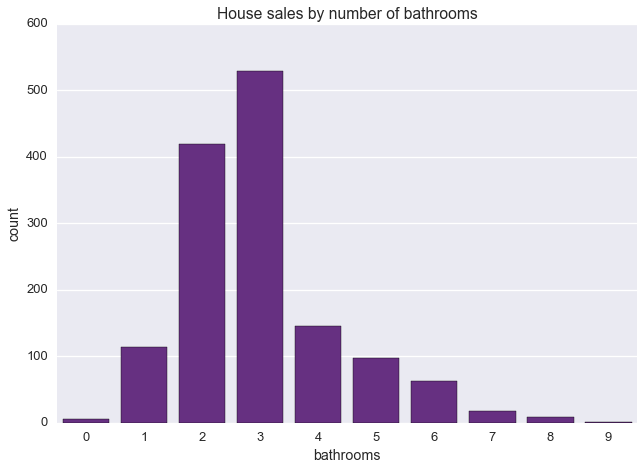

In [273]:
# Initialise figure and axes 
fig, ax = plt.subplots()


# Further customisation
ax.set_ylabel('Count')
ax.set_title('House sales by number of bathrooms')

ax = sb.countplot(x="bathrooms", data=houses, color='#6B238E')

# Popularity of en-suite bathrooms
A preference towards en-suite bathrooms can also be observed

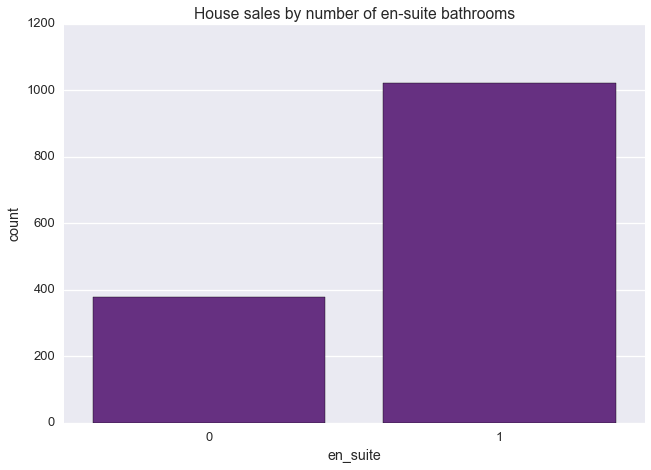

In [274]:
# Initialise figure and axes 
fig, ax = plt.subplots()


# Further customisation
ax.set_ylabel('Count')
ax.set_title('House sales by number of en-suite bathrooms')

ax = sb.countplot(x="en_suite", data=houses, color='#6B238E')

# House age distribution
Most houses sold were around 50 years old

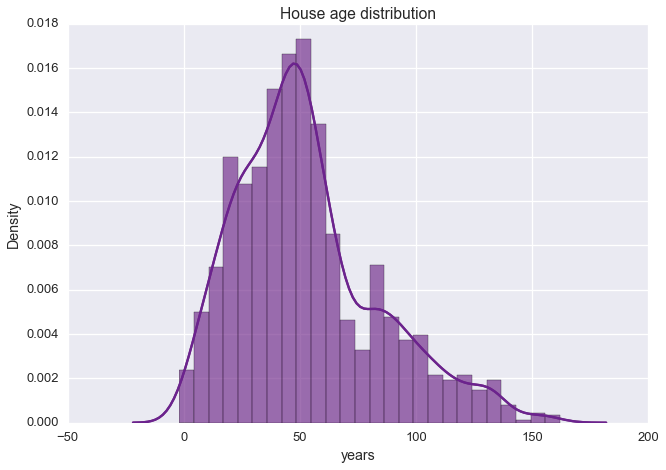

In [275]:
# Initialise figure and axes 
fig, ax = plt.subplots()

# Update axis object 
ax = sb.distplot(houses.years, ax=ax)

# Further customisation
ax.set_ylabel('Density')
ax.set_title('House age distribution')

sb.distplot(houses['years'], color='#6B238E')

In [276]:
districts = houses.groupby('district').agg('count')

In [277]:
# districts.head()

In [278]:
top_districts=districts.sort_values(by='price', ascending=0).head(10)

# Most relevant variables for the price distribution

In [279]:
houses.corr().price

Unnamed: 0   -0.064424
price         1.000000
sqm           0.465159
years         0.055388
bedrooms      0.446822
bathrooms     0.392845
en_suite      0.099082
Name: price, dtype: float64

# Relevance ranking on numerical variables
1. sqm
2. bedrooms
3. bathrooms
4. en-suite
5. years

In [280]:
houses.head(1)

,Unnamed: 0,price,date,sqm,postcode,property_type,new_build,estate_type,number,street,town,district,transaction_category,Adress,index,years,bedrooms,bathrooms,en_suite
0,1,249950,2011-08-15,67,E1 1BW,flat,No,leasehold,21,ALBION YARD,LONDON,TOWER HAMLETS,A,21 ALBION YARD,LONDON1,20,2,2,0


## Relevance of property type

In [281]:
idx_flat = houses.property_type == 'flat'
idx_terraced = houses.property_type == 'terraced'
idx_semi = houses.property_type == 'semi-detached'
idx_detached = houses.property_type == 'detached'

In [282]:
flats = houses.ix[idx_flat, :]['price']
terraced = houses.ix[idx_terraced, :]['price']
semi = houses.ix[idx_semi, :]['price']
detached = houses.ix[idx_detached, :]['price']

In [283]:
flats.head()

0    249950
1    485000
2    220000
3    169000
4    495000
Name: price, dtype: int64

In [284]:
sb.set_palette("Paired")

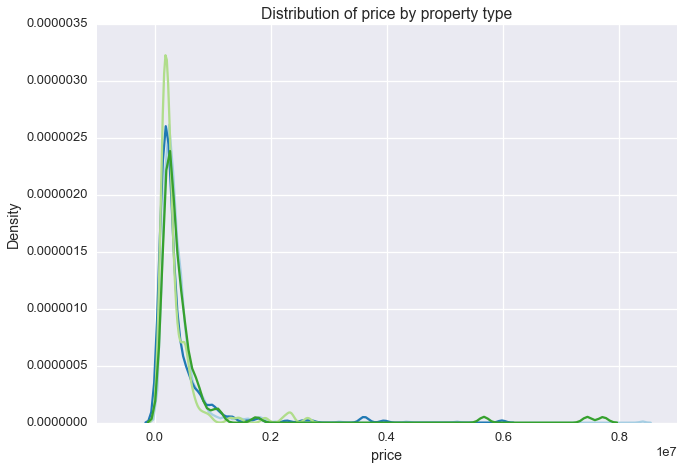

In [285]:
# Initialise figure and axes 
fig, ax = plt.subplots()

# Update axis object 
# ax = sb.distplot(flats, ax=ax)

# Further customisation
ax.set_ylabel('Density')
ax.set_title('Distribution of price by property type')

sb.distplot(flats, hist=False)
sb.distplot(terraced, hist=False)
sb.distplot(semi, hist=False)
sb.distplot(detached, hist=False)

# Relevance of new house

In [286]:
idx_new = houses.new_build == 'Yes'
idx_old = houses.new_build == 'No'

In [287]:
new = houses.ix[idx_new, :]['price']
old = houses.ix[idx_old, :]['price']

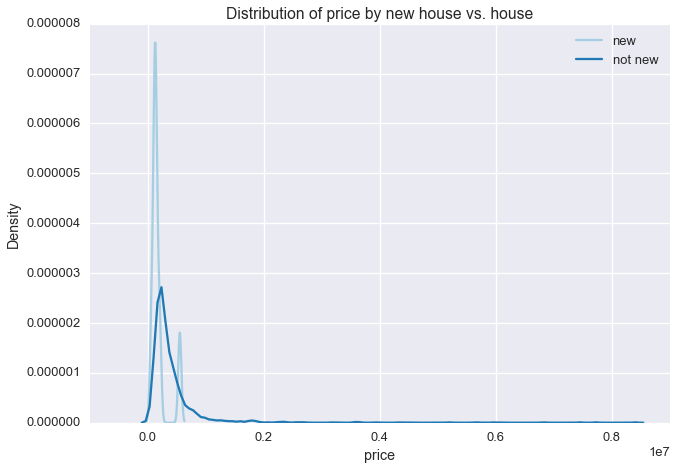

In [288]:
# Initialise figure and axes 
fig, ax = plt.subplots()

# Further customisation
ax.set_ylabel('Density')
ax.set_title('Distribution of price by new house vs. house')

sb.distplot(new, hist=False, label="new")
sb.distplot(old, hist=False, label="not new")

# Relevance of estate type

In [289]:
idx_lease = houses.estate_type == 'leasehold'
idx_free = houses.estate_type == 'freehold'

In [290]:
lease = houses.ix[idx_lease, :]['price']
free = houses.ix[idx_free, :]['price']

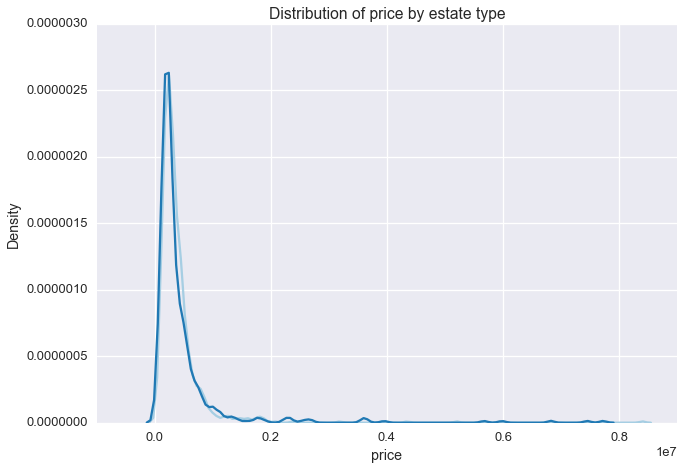

In [291]:
# Initialise figure and axes 
fig, ax = plt.subplots()

# Further customisation
ax.set_ylabel('Density')
ax.set_title('Distribution of price by estate type')

sb.distplot(lease, hist=False)
sb.distplot(free, hist=False)

# Relevance of town

In [292]:
houses['town'].unique()

array(['LONDON', 'MANCHESTER', 'BATH', 'BRISTOL', 'CARDIFF'], dtype=object)

In [293]:
idx_london = houses.town == 'LONDON'
idx_manch = houses.town == 'MANCHESTER'
idx_bath = houses.town == 'BATH'
idx_bristol = houses.town == 'BRISTOL'
idx_cardiff = houses.town == 'CARDIFF'

In [294]:
london = houses.ix[idx_london, :]['price']
manch = houses.ix[idx_manch, :]['price']
bath = houses.ix[idx_bath, :]['price']
bristol = houses.ix[idx_bristol, :]['price']
cardiff = houses.ix[idx_cardiff, :]['price']

(0, 1600000)

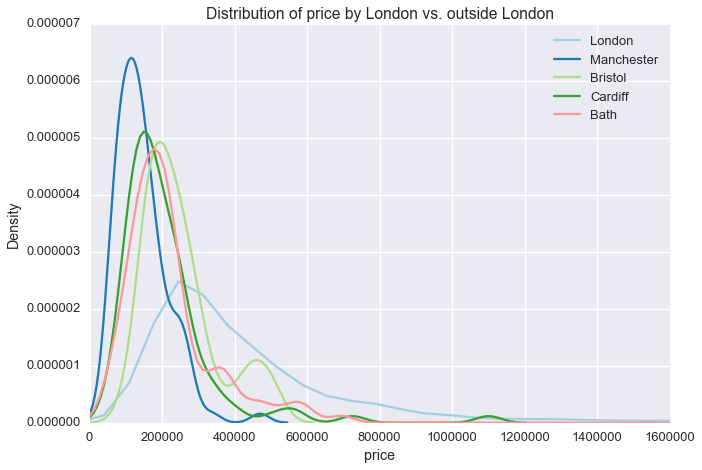

In [326]:
from math import exp
# Initialise figure and axes 
fig, ax = plt.subplots()

# Further customisation
ax.set_ylabel('Density')
ax.set_title('Distribution of price by London vs. outside London')

sb.distplot(london, hist=False, label='London')
sb.distplot(manch, hist=False, label='Manchester')
sb.distplot(bristol, hist=False, label='Bristol')
sb.distplot(cardiff, hist=False, label='Cardiff')
sb.distplot(bath, hist=False, label='Bath')

ax.set_xlim(0, 1600000)

# Most relevant categorical variables
- Town (Bristol, Cardiff, and Bath may be joined into one category)